<h4>Q-1. A university wants to understand the relationship between the SAT scores of its
applicants and their college GPA. They collect data on 500 students, including their SAT
scores (out of 1600) and their college GPA (on a 4.0 scale). They find that the correlation
coefficient between SAT scores and college GPA is 0.7. What does this correlation
coefficient indicate about the relationship between SAT scores and college GPA?

Ans: SAT scores and college GPA are strongly correlated (considering anything above 0.7 to be strong correlation)

<h4>Q-2. Consider a dataset containing the heights (in centimeters) of 1000 individuals. The
mean height is 170 cm with a standard deviation of 10 cm. The dataset is approximately
normally distributed, and its skewness is approximately zero. Based on this information,
answer the following questions:

In [24]:
from scipy.stats import norm
import numpy as np

def z_score(x, mean, std, n):
    z = (x-mean)/(std/np.sqrt(n))
    return z

def p_value(x, mean, std, n):
    z = z_score(x, mean, std, n)
    p_value = norm.cdf(z)
    return p_value

a. What percentage of individuals in the dataset have heights between 160 cm
and 180 cm?

z_180 = p_value(180, 170, 10, 1000)
z_160 = p_value(160, 170, 10, 1000)
ans = z_180 - z_160
print(ans)

Ans: 100%

b. If we randomly select 100 individuals from the dataset, what is the probability
that their average height is greater than 175 cm?

In [26]:
z_175 = p_value(175, 170, 10, 100)
print(1 - z_175)

2.866515719235352e-07


Ans: 0

c. Assuming the dataset follows a normal distribution, what is the z-score
corresponding to a height of 185 cm?

In [27]:
print(z_score(185, 170, 10, 1000))

47.43416490252569


Ans: 47.43416490252569

d. We know that 5% of the dataset has heights below a certain value. What is
the approximate height corresponding to this threshold?

In [31]:
norm.ppf(.05)

-1.6448536269514729

Ans: -1.6448536269514729

e. Calculate the coefficient of variation (CV) for the dataset.

In [33]:
cv = 10 / 170
print(cv)

0.058823529411764705


Ans: 0.058823529411764705

f. Calculate the skewness of the dataset and interpret the result.

Since it's given that data is normally distributed and mean is 170. It's assumed median also to be 170. So skewness is 0

<h4>Q-3. Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the
data and calculate the following

In [39]:
import pandas as pd
data = pd.read_csv('data.csv')
data

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


a. Measure the dispersion in both and interpret the results.

In [38]:
print(f'SD of Blood Pressure Before: {data.iloc[:, 1].std()}')
print(f'SD of Blood Pressure After: {data.iloc[:, 2].std()}')

SD of Blood Pressure Before: 6.598278012275075
SD of Blood Pressure After: 6.8880221025232276


Both the samples have almost the same amount of dispersion

b. Calculate mean and 5% confidence interval and plot it in a graph

In [44]:
def conf_interval(x, conf=0.95):
    mean = np.mean(x)
    sd = np.std(x)
    return norm.interval(conf, loc=mean, scale=sd)

print(f"95% confidence interval of Blood Pressure Before: {conf_interval(data.iloc[:, 1])}")
print(f"95% confidence interval of Blood Pressure After: {conf_interval(data.iloc[:, 2])}")

95% confidence interval of Blood Pressure Before: (121.04243714048087, 146.77756285951912)
95% confidence interval of Blood Pressure After: (114.92739573308545, 141.79260426691457)


c. Calculate the Mean absolute deviation and Standard deviation and interpret
the results.

print(f"MAD of Blood Pressure Before: {data.iloc[:, 1].mad()}")
print(f"MAD of Blood Pressure After: {data.iloc[:, 2].mad()}")

Both the samples have almost the same amount of MAD

d. Calculate the correlation coefficient and check the significance of it at 1% level
of significance.

In [48]:
from scipy.stats import pearsonr

In [50]:
pearsonr(x=data.iloc[:, 1], y=data.iloc[:, 1])

PearsonRResult(statistic=0.9999999999999999, pvalue=0.0)

<h4>Q-4. A group of 20 friends decide to play a game in which they each write a number
between 1 and 20 on a slip of paper and put it into a hat. They then draw one slip of paper
at random. What is the probability that the number on the slip of paper is a perfect square
(i.e., 1, 4, 9, or 16)?

In [58]:
4 / 20

0.2

Ans: 0.2

<h4>Q-5. A certain city has two taxi companies: Company A has 80% of the taxis and
Company B has 20% of the taxis. Company A's taxis have a 95% success rate for picking
up passengers on time, while Company B's taxis have a 90% success rate. If a randomly
selected taxi is late, what is the probability that it belongs to Company A?

In [59]:
print(f'Probability taxi belongs to company A: {0.8 * 0.95}')
print(f'Probability taxi belongs to company A: {0.2 * 0.9}')

Probability taxi belongs to company A: 0.76
Probability taxi belongs to company A: 0.18000000000000002


<h4>Q-6. A pharmaceutical company is developing a drug that is supposed to reduce blood
pressure. They conduct a clinical trial with 100 patients and record their blood
pressure before and after taking the drug. The company wants to know if the change
in blood pressure follows a normal distribution.

In [63]:
#  Shapiro-Wilk Test for small samples
from scipy.stats import shapiro
for i in data.columns[1:]:
    print(f'{i}: {"Not Gaussian" if shapiro(data[i])[1]<0.05 else "Gaussian"}  {shapiro(data[i])}')

 Blood Pressure Before (mmHg): Not Gaussian  ShapiroResult(statistic=0.9573234915733337, pvalue=0.002603276167064905)
 Blood Pressure After (mmHg): Not Gaussian  ShapiroResult(statistic=0.9400556683540344, pvalue=0.00019430516113061458)


<h4>Q-7. The equations of two lines of regression, obtained in a correlation analysis
between variables X and Y are as follows:
and . 2𝑋 + 3 − 8 = 0 2𝑌 + 𝑋 − 5 = 0 The variance of 𝑋 = 4 Find the
a. Variance of Y
b. Coefficient of determination of C and Y
c. Standard error of estimate of X on Y and of Y on X.

<h4>Q-8. The anxiety levels of 10 participants were measured before and after a new therapy.
The scores are not normally distributed. Use the Wilcoxon signed-rank test to test whether
the therapy had a significant effect on anxiety levels. The data is given below: Participant
Before therapy After therapy Difference

<h4>Q-9. Given the score of students in multiple exams

In [91]:
df = pd.DataFrame({'name': ['karan', 'deepa', 'karthik', 'chandan', 'jeevan'],
                   'exam_1': [85, 70, 90, 75, 95],
                  'exam_2': [90, 80, 85, 70, 92],
                  'exam_3': [92, 85 ,88, 75, 96]})

In [88]:
df

,name,exam_1,exam_2,exam_3
0,karan,85,90,92
1,deepa,70,80,85
2,karthik,90,85,88
3,chandan,75,70,75
4,jeevan,95,92,96


Q: Test the hypothesis that the mean scores of all the students are the same.

In [89]:
from scipy.stats import f_oneway
f_oneway(df.iloc[0, 1:], df.iloc[1, 1:], df.iloc[2, 1:], df.iloc[3, 1:], df.iloc[4, 1:])

F_onewayResult(statistic=12.025830258302586, pvalue=0.0007760917135044952)

One way anova p-value is < 0.05 hence we can reject null hypothesis (mean score of all students is same). Hence, means scores of students is not same

Q: If not, name the
student with the highest score.

In [92]:
df.set_index('name', inplace=True)
df.mean(axis=1).sort_values(ascending=False)

name
jeevan     94.333333
karan      89.000000
karthik    87.666667
deepa      78.333333
chandan    73.333333
dtype: float64

Jeevan has highest mean score

<h4>Q-10. A factory produces light bulbs, and the probability of a bulb being defective is 0.05.
The factory produces a large batch of 500 light bulbs.

In [94]:
from scipy.stats import binom_test

a. What is the probability that exactly 20 bulbs are defective?

In [96]:
binom_test(x=20, n=500, p=0.05)

0.35532145910240864

b. What is the probability that at least 10 bulbs are defective?

In [100]:
binom_test(x=9, n=500, p=0.05, alternative="greater")

0.9999445061796528

c. What is the probability that at max 15 bulbs are defective?

In [102]:
binom_test(x=16, n=500, p=0.05, alternative="less")

0.034290186598394896

d. On average, how many defective bulbs would you expect in a batch of 500?

In [104]:
# n*p
print(500 * 0.05)

25.0


<h4>Q-11. Given the data of a feature contributing to different classes

a. Check whether the distribution of all the classes are the same or not.

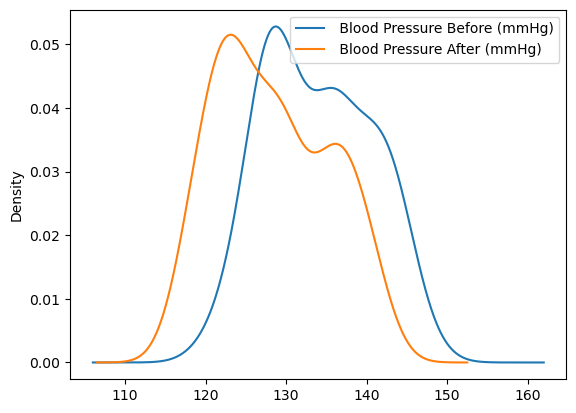

In [109]:
data.iloc[:, 1:].plot(kind='kde');

Both samples have similar distribution

b. Check for the equality of variance

In [110]:
from scipy.stats import levene

In [111]:
levene(data.iloc[:, 1], data.iloc[:, 2])

LeveneResult(statistic=0.18038002140150966, pvalue=0.6715080090945376)

Since p-value > 0.05 we can't reject null hypotheses that both variances are equal. Hence, both variances are equal

d. Check the equality of mean for between all the classes.

In [112]:
from scipy.stats import ttest_rel

In [113]:
ttest_rel(data.iloc[:, 1], data.iloc[:, 2])

Ttest_relResult(statistic=38.40500458621546, pvalue=2.817165090364283e-61)

Since p-value < 0.05 we can reject null hypotheses that difference b/w both means is 0 i.e. both means are equal. Hence, both means are not equal

<h4>Q-12. A pharmaceutical company develops a new drug and wants to compare its
effectiveness against a standard drug for treating a particular condition. They conduct a
study with two groups: Group A receives the new drug, and Group B receives the standard
drug. The company measures the improvement in a specific symptom for both groups after
a 4-week treatment period.

In [115]:
n = 30
mean_a = 2.5
std_a = 0.8
mean_b = 2.2
std_b = 0.6

In [126]:
from scipy.stats import t
def two_samp_ttest(mean_a, mean_b, std_a, std_b, n):
    pooled_sd = np.sqrt(((std_a ** 2) / n) + ((std_b ** 2) / n))
    t_ = (mean_a - mean_b) / pooled_sd
    p = t.sf(t_, df=(n + n - 2)) * 2
    return t_, p

In [128]:
t_, p = two_samp_ttest(2.5, 2.2, 0.8, 0.6, 30)
print(f't-statistic= {t_}\np-value= {p}')

t-statistic= 1.6431676725154973
p-value= 0.10575916705583678


Since, p-value > 0.05 we can't reject null hypothesis (means are same). Hence, mean  of 2 samples is same

There is no imporovement in the groups